In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

In [2]:
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [3]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: TV, Radio, Newspaper \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: TV, Radio, Newspaper 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


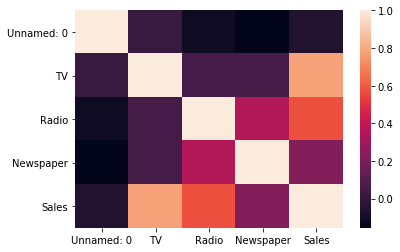

In [4]:
sns.heatmap(data.corr())

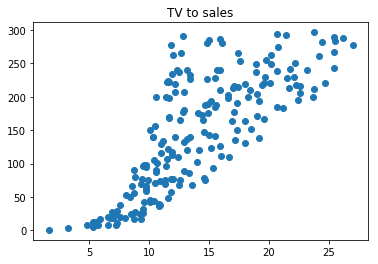

In [5]:
# Sample data.
outcome = data['Sales']
feature = data['TV']

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('TV to sales')
plt.show()

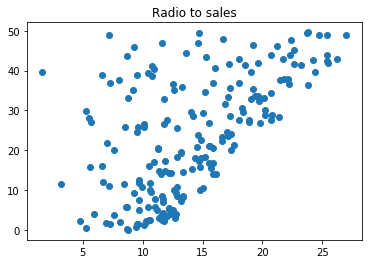

In [6]:
# Sample data.
outcome = data['Sales']
feature = data['Radio']

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('Radio to sales')
plt.show()

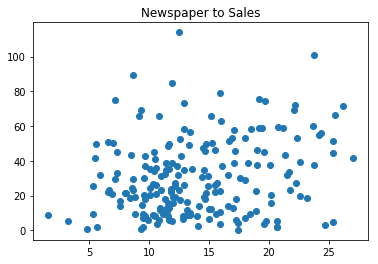

In [7]:
# Sample data.
outcome = data['Sales']
feature = data['Newspaper']

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('Newspaper to Sales')
plt.show()

# The data without treatment

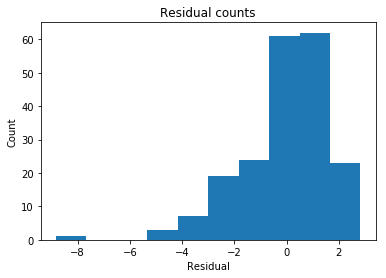

In [8]:
# Stop here: take the TV data and try to normalize it
# Not sure what to do with the newspaper and radio sales- they are crap
# want to take TV values and log them, and then sqrt them

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

# The log of Sales 

In [9]:
logged_sales = np.log(data['Sales'])

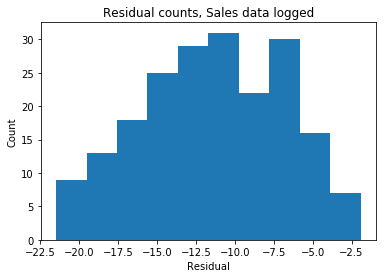

In [10]:
# Stop here: take the TV data and try to normalize it
# Not sure what to do with the newspaper and radio sales- they are crap
# want to take TV values and log them, and then sqrt them

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = logged_sales

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts, Sales data logged')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

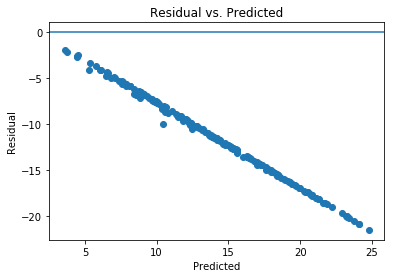

In [11]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# The Sqrt of Sales

In [13]:
sqrt_sales = np.sqrt(data['Sales'])

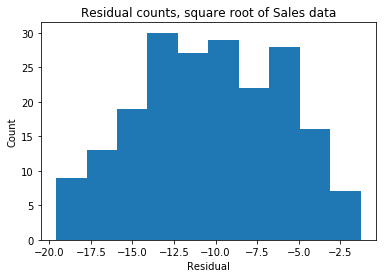

In [16]:
# Stop here: take the TV data and try to normalize it
# Not sure what to do with the newspaper and radio sales- they are crap
# want to take TV values and log them, and then sqrt them

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = sqrt_sales

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts, square root of Sales data')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

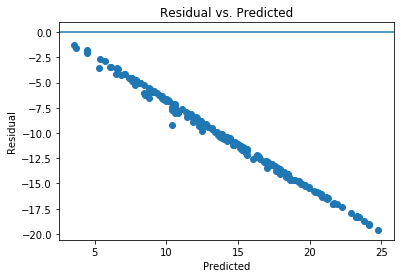

In [17]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# For kicks, trying cubed root

In [18]:
cbrt_sales = np.cbrt(data['Sales'])

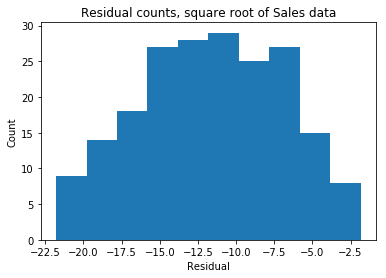

In [19]:
# Stop here: take the TV data and try to normalize it
# Not sure what to do with the newspaper and radio sales- they are crap
# want to take TV values and log them, and then sqrt them

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = cbrt_sales

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts, square root of Sales data')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

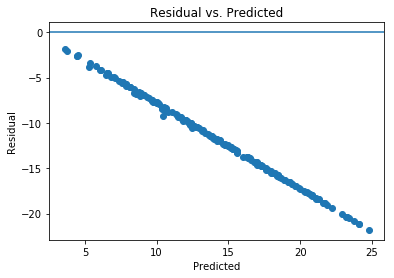

In [20]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()